In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
from scipy.stats import pearsonr
import statsmodels.api as sm
import joblib
import warnings

warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv('sbikedata.csv')
df = df.dropna()

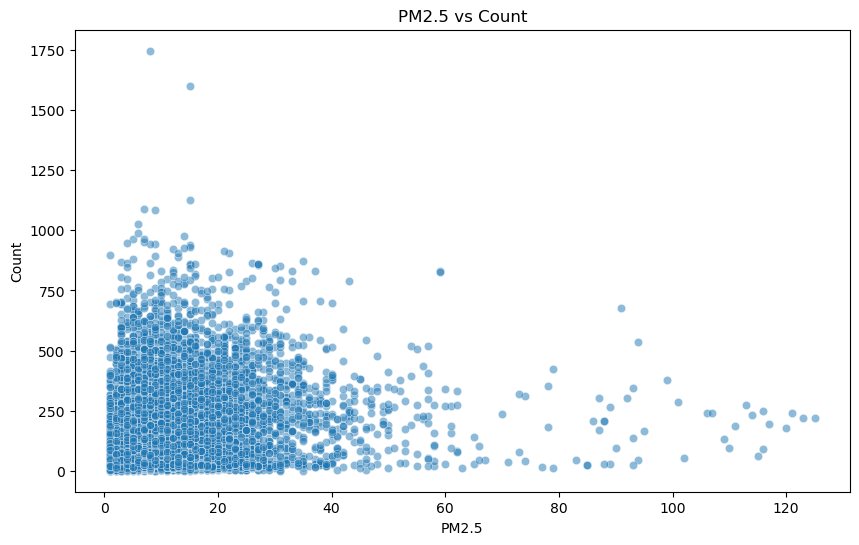

In [15]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PM2.5', y='count', alpha=0.5)

plt.title('PM2.5 vs Count')
plt.xlabel('PM2.5')
plt.ylabel('Count')

plt.show()

In [16]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
correlation_coefficient, p_value = pearsonr(df['PM2.5'], df['count'])

print(f"상관계수 : {correlation_coefficient}")
print(f"P-value : {p_value}")

상관계수 : 0.0529237283818275
P-value : 6.690256718091033e-05


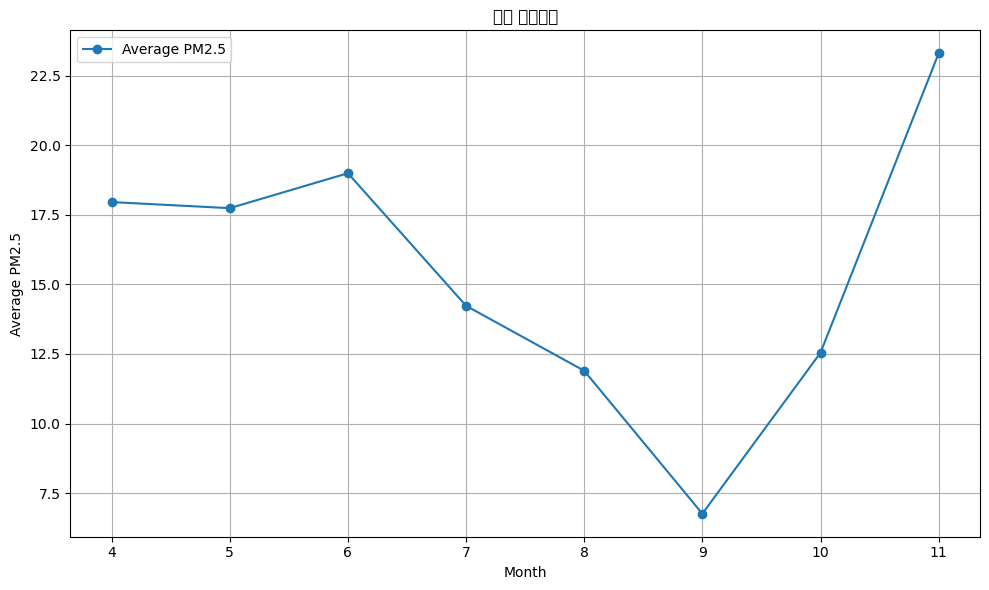

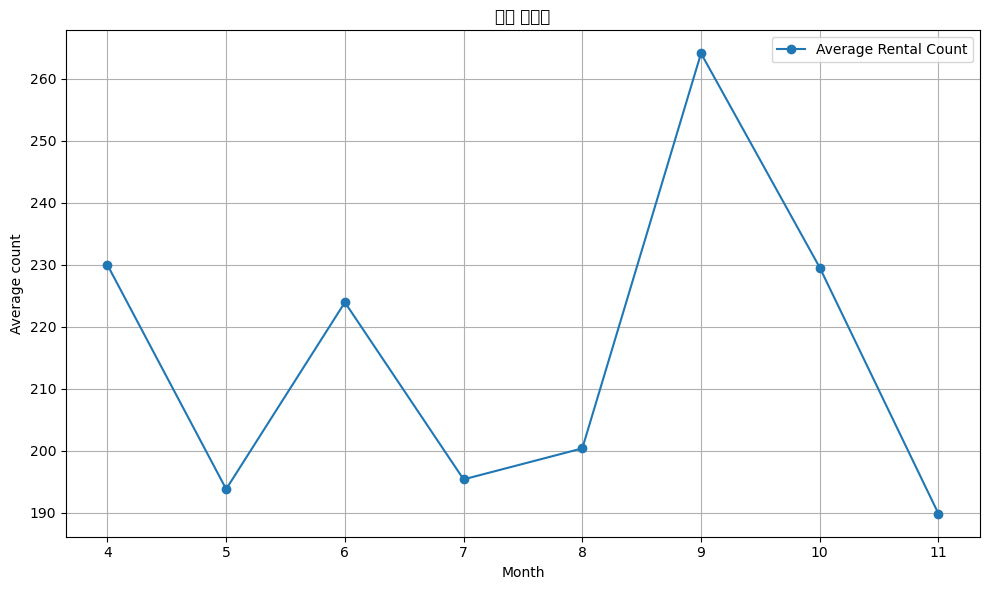

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count,month
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46,4
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40,4
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31,4
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12,4
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30,4


In [22]:
df2 = df.copy()
df2['date'] = pd.to_datetime(df2['date'])
# 날짜를 월 단위로 변환하여 새로운 열 추가
df2['month'] = df2['date'].dt.month

#월별 미세먼지 그래프
monthly_avg = df2.groupby('month').mean()

plt.figure(figsize=(10, 6))
plt.plot(monthly_avg.index, monthly_avg['PM2.5'], marker='o', label='Average PM2.5')

plt.xlabel('Month')
plt.ylabel('Average PM2.5')
plt.title('월별 미세먼지')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#월별 대여량 그래프
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg.index, monthly_avg['count'], marker='o', label='Average Rental Count')

plt.xlabel('Month')
plt.ylabel('Average count')
plt.title('월별 대여량')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

df2.head()

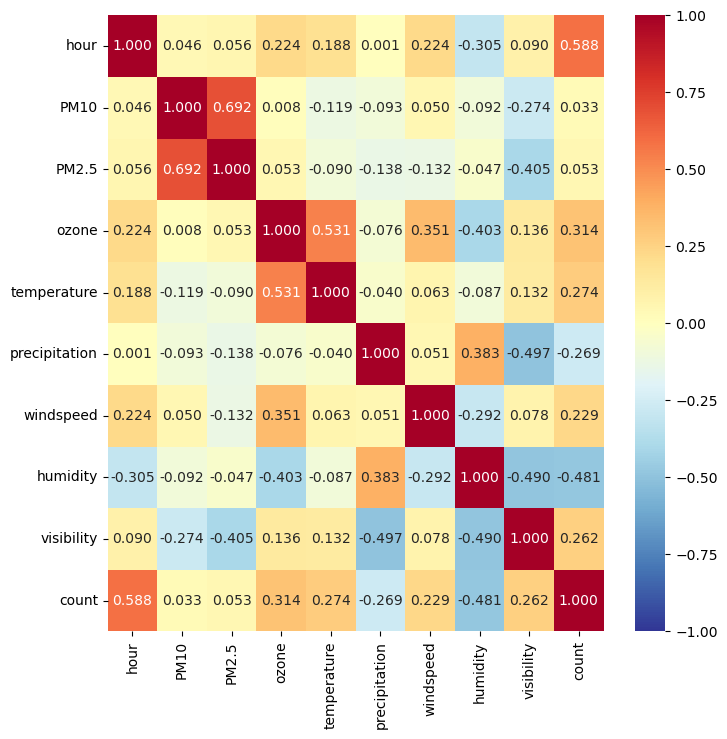

In [23]:
df2 = df2.drop(columns=['date','month'])
plt.figure(figsize = (8, 8))
sns.heatmap(df2.corr(), 
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값
plt.show()